<a href="https://colab.research.google.com/github/ashaduzzaman-sarker/Bank-Customer-Churn-Rate-Prediction./blob/main/Bank_Customer_Churn_Rate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Churn Rate Prediction
---


## 1. Introduction

**Dataset Source:**

https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers


**We aim to accomplist the following for this study:**

- Identify and visualize which factors contribute to customer churn.

- Build a prediction model that will perform the following:

  - Classify if a customer is going to churn or not
  - Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## 1. Data preprocessing

### Importing the libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

### Data Exploration

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Dealing with missing data

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Encoding Categorical data

In [11]:
data.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [12]:
len(data.select_dtypes(include='object').columns)

3

In [13]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
data.shape

(10000, 11)

In [17]:
data_encode = pd.get_dummies(data, drop_first=True)

In [18]:
data_encode

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [19]:
data_encode[['Geography_Germany', 'Geography_Spain', 'Gender_Male']] = data_encode[['Geography_Germany', 'Geography_Spain', 'Gender_Male']].astype(int)

In [20]:
data_encode.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Count Plot

In [21]:
data_encode['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

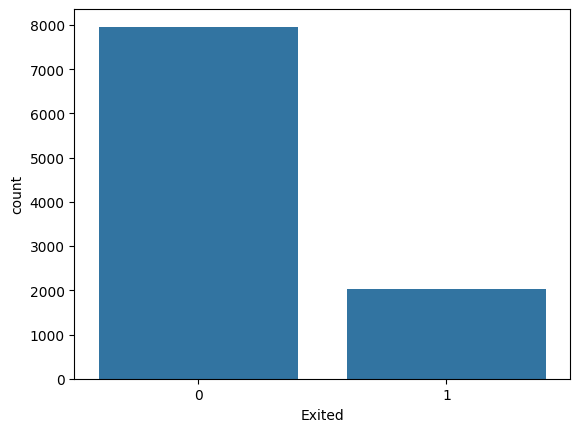

In [22]:
sns.countplot(x='Exited', data=data_encode)
plt.show()

### Proportion of customer churned and retained (Pie Chart)

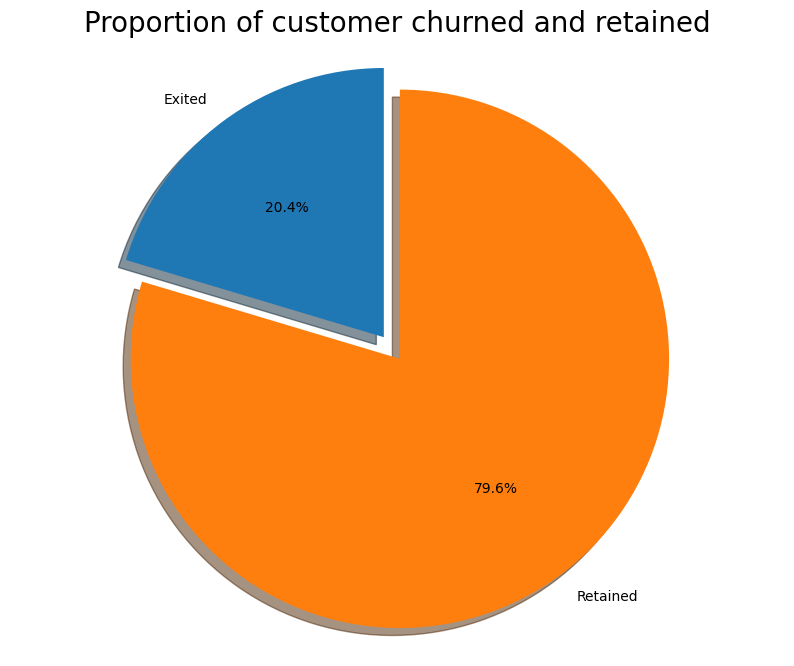

In [23]:
labels = 'Exited', 'Retained'
exited_count = data_encode['Exited'].sum()
retained_count = len(data_encode) - exited_count
sizes = [exited_count, retained_count]

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size=20)
plt.show()

### Correlation matrix and Heatmap

In [24]:
data_encode.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
df = data_encode.drop(columns='Exited')

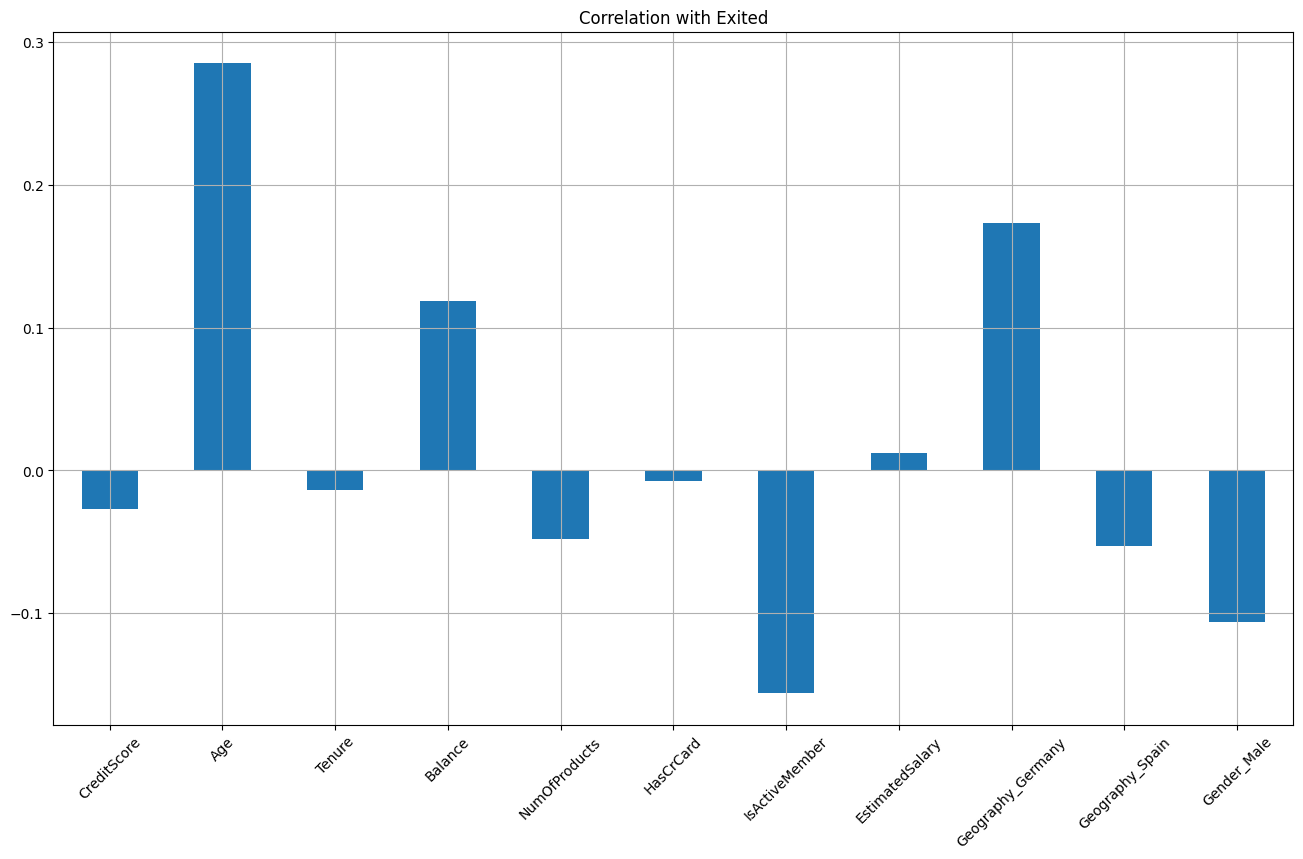

In [26]:
correlation = df.corrwith(data_encode['Exited'])
correlation.plot.bar(figsize=(16, 9), title=f'Correlation with Exited', rot=45, grid=True)
plt.show()

In [27]:
# Create Correlation Matrix
corr_matrix = data_encode.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


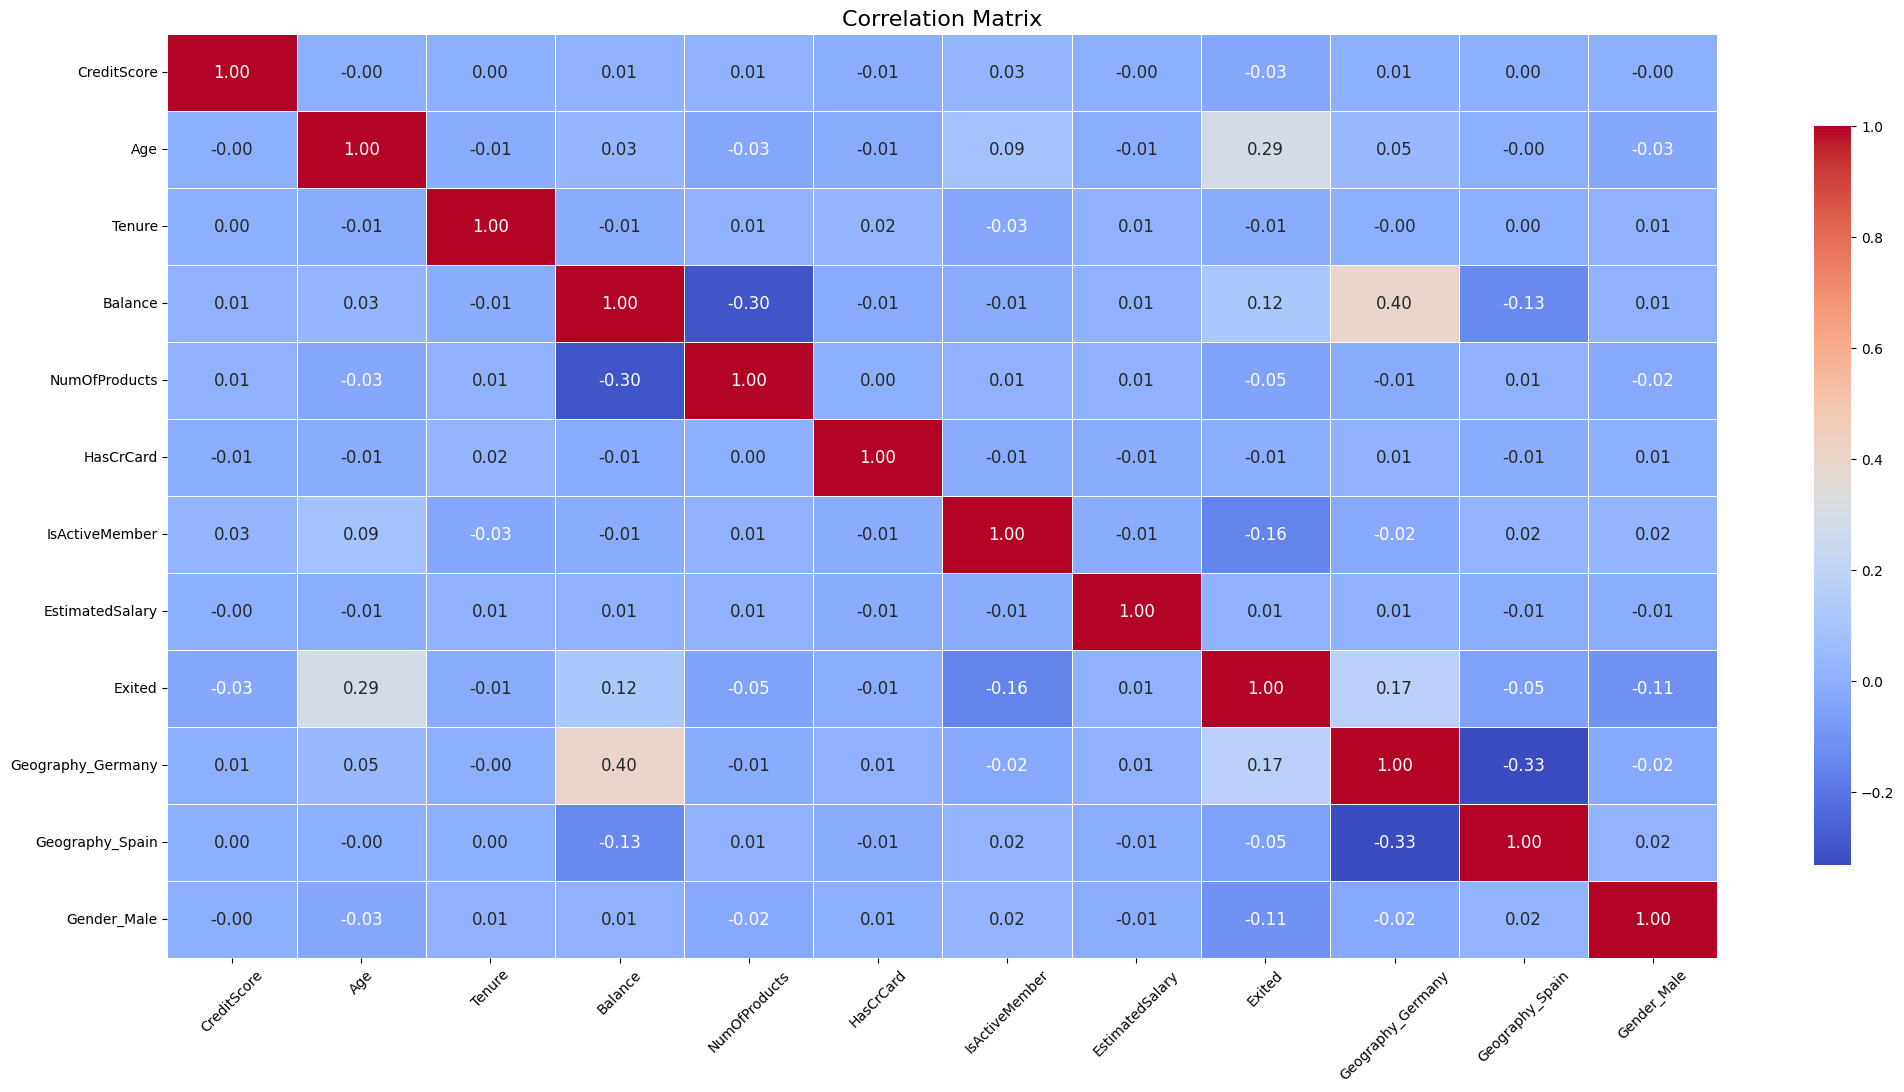

In [28]:
# Let's make a heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Change the colormap to 'coolwarm' for better visual contrast
            annot_kws={"size": 12},  # Adjust the size of the annotations
            cbar_kws={"shrink": 0.8})  # Shrink the color bar to make it less dominant

plt.title('Correlation Matrix', fontsize=16)  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.show()

### Splitting the dataset into train and test set

In [29]:
X=data_encode.drop(columns='Exited')
y=data_encode['Exited']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training labels size: {y_train.shape[0]} samples")
print(f"Testing labels size: {y_test.shape[0]} samples")

Training set size: 8000 samples
Testing set size: 2000 samples
Training labels size: 8000 samples
Testing labels size: 2000 samples


### Feature scaling

In [32]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [34]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

## 2. Building the model

### Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### Evaluation_scores

In [36]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.81
_______________________________________________
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



#### Cross Validation Scores

In [37]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[0.80125 0.805   0.8     0.79    0.82375 0.8075  0.81375 0.80125 0.81875
 0.82625]
_______________________________________________
Mean Accuracy: 0.81
_______________________________________________
Standard Deviation: 0.01


#### ROC curve and calculate AUC Function

AUC: 0.78


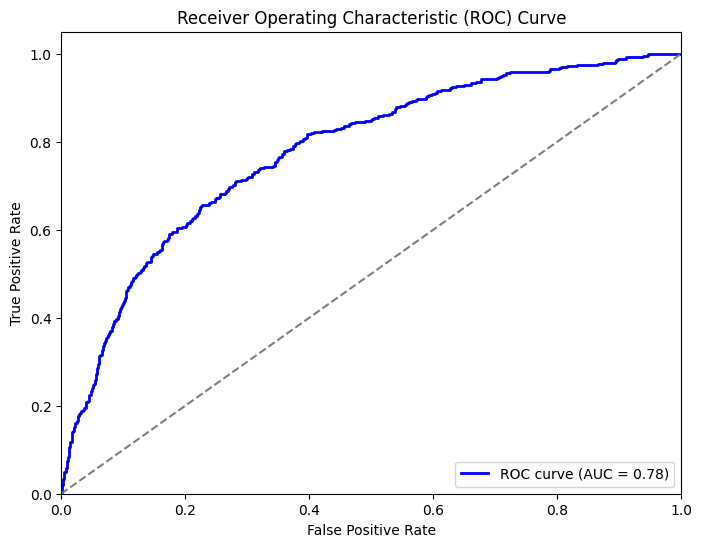

In [38]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_score = log_reg.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier object
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

#### Evaluation_scores

In [40]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.87
_______________________________________________
Confusion Matrix:
 [[1550   57]
 [ 210  183]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



#### Cross Validation for Random Forest Algorithm

In [41]:
# Perform cross-validation
scores = cross_val_score(estimator=random_forest, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[0.86875 0.85875 0.86    0.87    0.86375 0.865   0.8675  0.8525  0.86
 0.8575 ]
_______________________________________________
Mean Accuracy: 0.86
_______________________________________________
Standard Deviation: 0.01


#### ROC curve and calculate AUC Function

AUC: 0.87


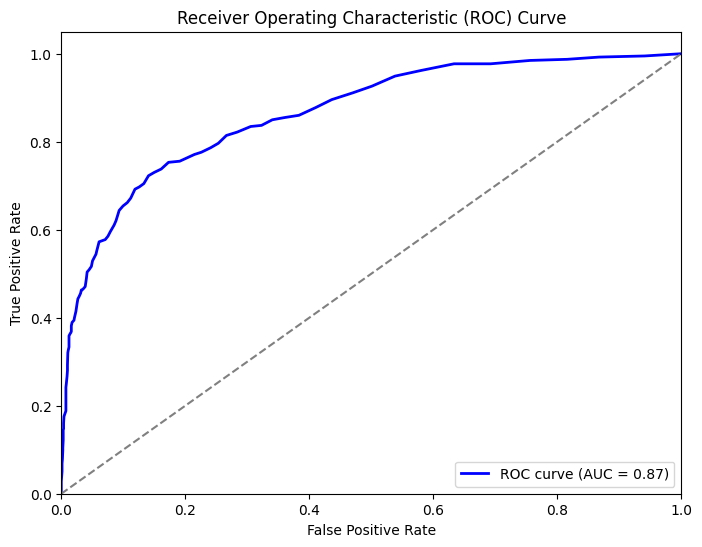

In [42]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost Classifer Model

In [43]:
from xgboost import XGBClassifier

# Create XGBoost classifier object
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

#### Evaluation_scores for XGBoost

In [44]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.86
_______________________________________________
Confusion Matrix:
 [[1526   81]
 [ 191  202]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



#### Cross Validation for XGBoost

In [45]:
# Perform cross-validation
scores = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[0.86875 0.8525  0.845   0.8575  0.85    0.85875 0.855   0.84875 0.845
 0.845  ]
_______________________________________________
Mean Accuracy: 0.85
_______________________________________________
Standard Deviation: 0.01


#### ROC curve and calculate AUC Function

AUC: 0.85


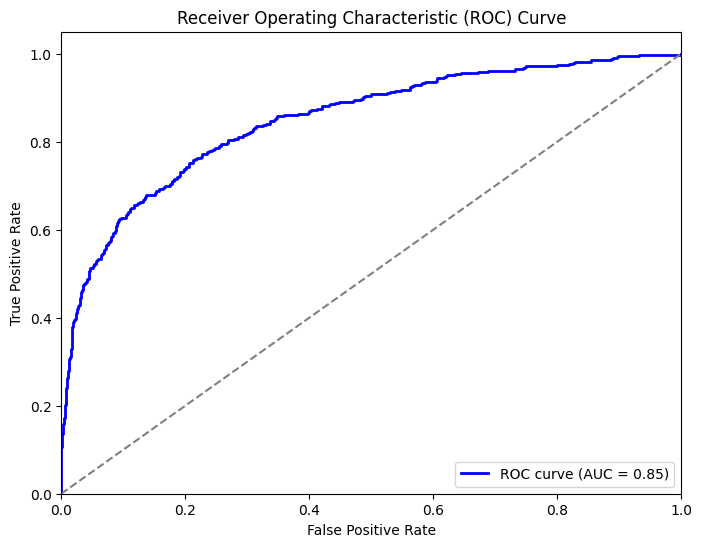

In [46]:
# Get predicted probabilities for the positive class
y_score = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## 3. Hyperparameter Optimization (RandomizedSearchCV)

### Logistic Regression


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameters and values to tune
param_dist ={'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'C': uniform(loc=0, scale=4),
              'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }


# Create RandomizedSearchCV
random_search_lr = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_lr.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for Logistic Regression:", random_search_lr.best_params_)

Best Parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'none', 'C': 0.75}


In [48]:
# Evaluate Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_best = random_search_lr.best_estimator_

lr_predictions = lr_best.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

lr_precision = precision_score(y_test, lr_predictions)
print("Logistic Regression precision:", lr_precision)

lr_recall = recall_score(y_test, lr_predictions)
print("Logistic Regression recall:", lr_recall)

lr_f1 = f1_score(y_test, lr_predictions)
print("Logistic Regression f1_score:", lr_f1)

Logistic Regression Accuracy: 0.811
Logistic Regression precision: 0.5524475524475524
Logistic Regression recall: 0.2010178117048346
Logistic Regression f1_score: 0.2947761194029851


AUC: 0.78


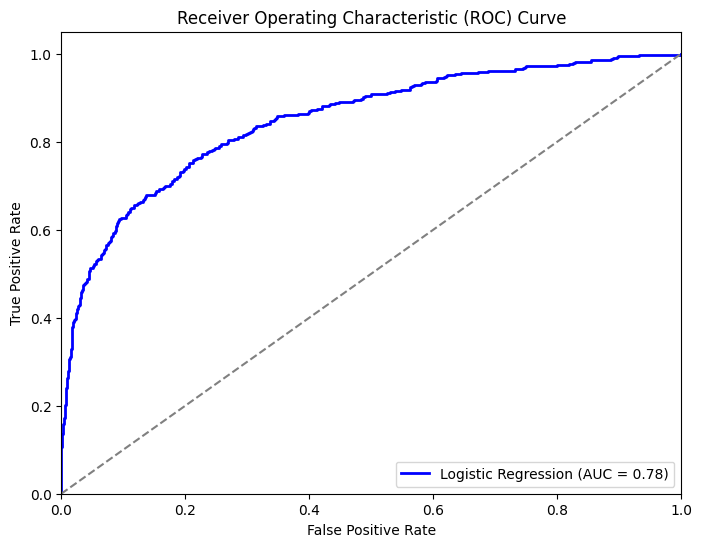

In [49]:
# Receiver Operating Characteristic (ROC) Curve

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
lr_probs = lr_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
lr_auc = roc_auc_score(y_test, lr_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# Print AUC
print(f"AUC: {lr_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Algorithm

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': [None] + list(randint(1, 100).rvs(10)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)  # Minimum number of samples required to be at a leaf node
}


# Create RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 63, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 829}


In [51]:
# Evaluate Random Forest
rf_best = random_search_rf.best_estimator_

rf_predictions = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, rf_predictions)
print("Random Forest precision:", rf_precision)

rf_recall = recall_score(y_test, rf_predictions)
print("Random Forest recall:", rf_recall)

rf_f1 = f1_score(y_test, rf_predictions)
print("Random Forest f1_score:", rf_f1)

Random Forest Accuracy: 0.865
Random Forest precision: 0.7551867219917012
Random Forest recall: 0.4631043256997455
Random Forest f1_score: 0.5741324921135647


AUC: 0.87


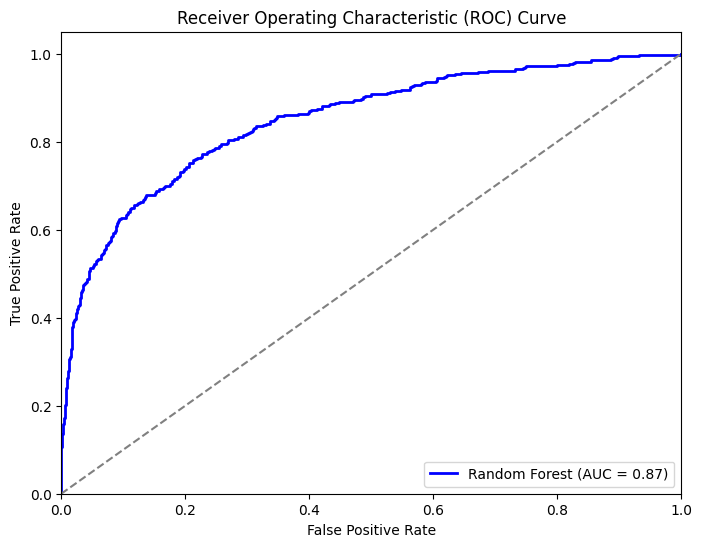

In [52]:
# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
rf_probs = rf_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
rf_auc = roc_auc_score(y_test, rf_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Print AUC
print(f"AUC: {rf_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost with RandomizedSearchCV

In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of the trees
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4)  # Subsample ratio of columns when constructing each tree
}

# Create XGBoost model
xgb = XGBClassifier()

# Create RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)

Best Parameters for XGBoost: {'colsample_bytree': 0.6063865008880857, 'learning_rate': 0.0792681476866447, 'max_depth': 6, 'min_child_weight': 7, 'subsample': 0.8439986631130484}


In [54]:
# Evaluate XGBoost
xgb_best = random_search_xgb.best_estimator_
xgb_predictions = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

xgb_precision = precision_score(y_test, xgb_predictions)
print("XGBoost precision:", xgb_precision)

xgb_recall = recall_score(y_test, xgb_predictions)
print("XGBoost recall:", xgb_recall)

xgb_f1 = f1_score(y_test, xgb_predictions)
print("XGBoost f1_score:", xgb_f1)

XGBoost Accuracy: 0.8645
XGBoost precision: 0.7401574803149606
XGBoost recall: 0.47837150127226463
XGBoost f1_score: 0.5811437403400308


AUC: 0.87


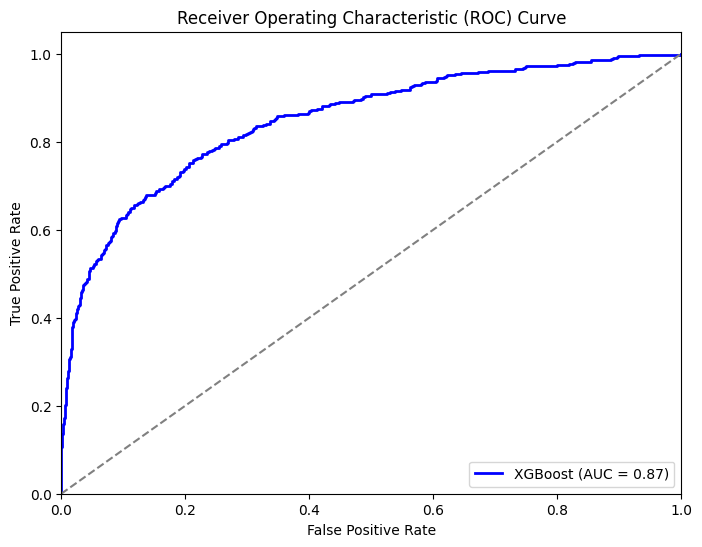

In [55]:
# Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
xgb_probs = xgb_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
xgb_auc = roc_auc_score(y_test, xgb_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

# Print AUC
print(f"AUC: {xgb_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 4. Result:

In [56]:
## Model Comparison Results after Hyperparameter Tuning
# lr_best, rf_best, and xgb_best are the best models obtained after hyperparameter tuning

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall],
    'F1-score': [lr_f1, rf_f1, xgb_f1]
})

# Round the values in the DataFrame to two decimal places
results_df = results_df.round(2)

# Define a function to highlight the maximum value in each column
def highlight_max_low_contrast(s):
    is_max = s == s.max()
    color = 'background-color: rgba(255, 255, 0, 0.3)'  # Yellow with 30% opacity
    return [color if v else '' for v in is_max]

# Apply the highlighting function to the DataFrame
styled_results_df = results_df.style.apply(highlight_max_low_contrast, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the results
print("Model Comparison Results after Hyperparameter Tuning:")
styled_results_df

Model Comparison Results after Hyperparameter Tuning:


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.810000,0.550000,0.200000,0.290000
1,Random Forest,0.860000,0.760000,0.460000,0.570000
2,XGBoost,0.860000,0.740000,0.480000,0.580000


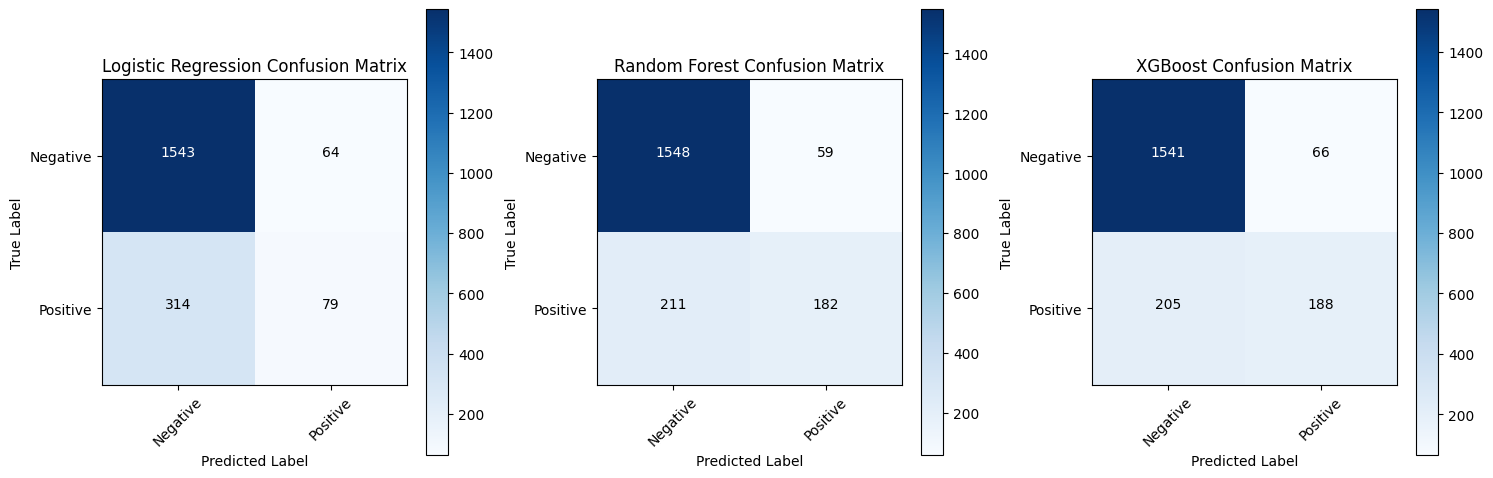

In [57]:
## Confusion matrix Comparison after Hyperparameter Tuning
import itertools
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix with annotations
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Define the classes (e.g., 'negative' and 'positive')
classes = ['Negative', 'Positive']

# Plot confusion matrices for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
lr_cm = confusion_matrix(y_test, lr_predictions)
plot_confusion_matrix(lr_cm, title='Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, title='Random Forest Confusion Matrix')

plt.subplot(1, 3, 3)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(xgb_cm, title='XGBoost Confusion Matrix')

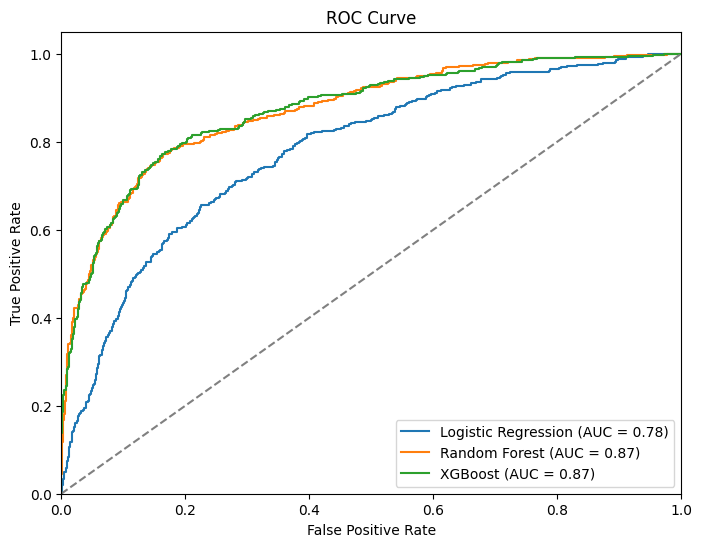

In [58]:
## ROC curve and AUC Comparison after Hyperparameter Tuning
from sklearn.metrics import roc_curve, roc_auc_score

# Define a function to plot ROC curve and calculate AUC
def plot_roc_curve(model_name, y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_score))

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

# Logistic Regression
plot_roc_curve('Logistic Regression', y_test, lr_probs)

# Random Forest
plot_roc_curve('Random Forest', y_test, rf_probs)

# XGBoost
plot_roc_curve('XGBoost', y_test, xgb_probs)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
## Predicting a single observation on best model
data_encode.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [60]:
data_encode.shape

(10000, 12)

In [61]:
X_test.shape

(2000, 11)

In [62]:
single_obs = [[619,	42,	2,	0.00,	1,	1,	1,	101348.88, 0,	0, 0]]

In [66]:
print(rf_best.predict(scaler.transform(single_obs)))

[0]


## 5. Conclusion

After thorough analysis and evaluation of different machine learning models for predicting customer churn, we have determined that the Random Forest model stands out as the best choice for our problem.

Our study aimed to achieve two main objectives: to identify and visualize factors contributing to customer churn, and to build a prediction model capable of classifying whether a customer is likely to churn or not, with the additional ability to assign probabilities to churn predictions.

Through the exploration of various models, Random Forest emerged as the top performer, demonstrating superior accuracy, precision, recall, and F1-score compared to other models such as Logistic Regression and XGBoost.

The Random Forest model not only accurately classifies customers into churn or non-churn categories but also provides valuable insights into the importance of different features contributing to churn. This enables us to visualize and understand the key drivers of churn in our dataset.

Furthermore, Random Forest's ability to generate probability estimates for churn predictions makes it a practical choice for customer service efforts. By attaching probabilities to churn predictions, customer service teams can prioritize their efforts more effectively, focusing on customers with higher churn probabilities and implementing targeted retention strategies to mitigate churn.

In conclusion, based on its robust performance metrics, interpretability, and ability to provide probability estimates, the Random Forest model is recommended as the preferred choice for predicting customer churn and guiding proactive retention efforts in our business scenario.